# Exercícios Treinando MLPs

In [ ]:
#importar libs
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.model_selection import train_test_split

import torch
import torch.nn as nn
import torch.optim as optim

#Ajuste de tamanho dos plots
plt.rcParams['figure.figsize'] = (8, 8)

## Faça você mesmo #1
Utilize o código abaixo para plotar com o matplotlib um gráfico para a função Sigmóide para valores entre -10 e +10. Teste também outros intervalos


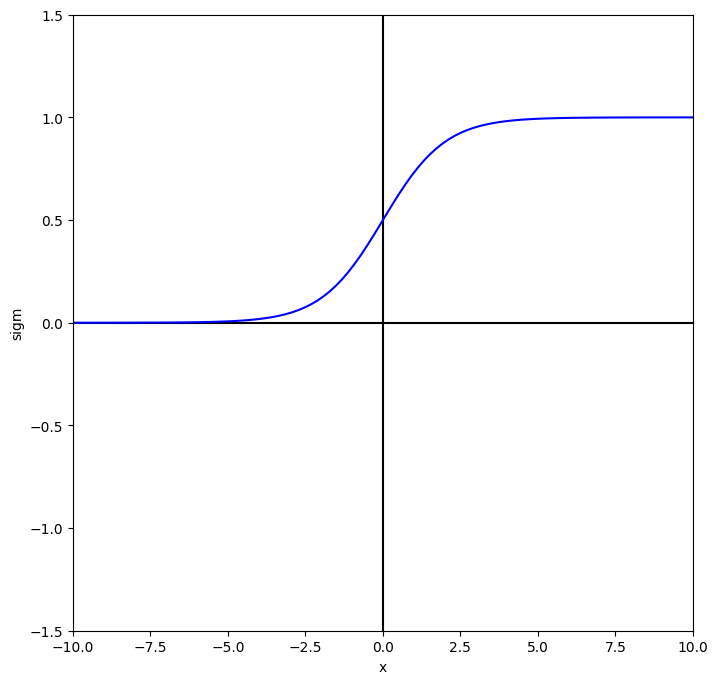

In [ ]:
intervalo = 10
x = np.linspace(-1*intervalo, intervalo, intervalo*2*5) #5 pontos por passo de 1
ex = np.exp(-1*x)
sigm = 1/(1 + ex)

plt.xlabel("x")
plt.ylabel("sigm")

plt.axvline(x=0, c="black", label="x=0")
plt.axhline(y=0, c="black", label="y=0")
plt.xlim(-1*intervalo, intervalo)
plt.ylim(-1.5, 1.5)

plt.plot(x, sigm, '-', color='blue')

## Faça você mesmo #2
Treino de uma rede MLP. Execute os próximos blocos para treinar a

### Definindo uma rede neural com o pytorch

In [ ]:
# Definir a arquitetura da rede neural
class NeuralNetwork(nn.Module):
    def __init__(self):
      #Outra forma de definir a rede é usando nn.Sequential.
      #Veja em https://pytorch.org/tutorials/beginner/basics/buildmodel_tutorial.html
      super(NeuralNetwork, self).__init__()
      #nn.Linear faz as operações lineares com os vetores, aplicando os pesos e o bias
      self.fc1 = nn.Linear(4, 4)  # Primeira camada. Quatro neurônios que geram 4 saídas
      self.fc2 = nn.Linear(4, 3)  # Segunda camada. Quatro neurônios que geram 3 saídas
      self.fc3 = nn.Linear(3, 3)  # Camada de saída. Um neurônio para cada classe possível
      #os pesos são inicializados aleatoriamente por padrão

    def forward(self, x):
      x = self.fc1(x)
      x = torch.sigmoid(x)  # Ativação Sigmoid para a primeira camada oculta
      x = self.fc2(x)  # Camada oculta
      x = torch.sigmoid(x)  # Ativação Sigmoid para a segunda camada oculta
      x = self.fc3(x)  # Camada de saída
      #Se quiser saídas como probabilidades a posteriori, inserir camada softmax
      return x

#construindo meu modelo
demo = NeuralNetwork()
print(demo) #printa camadas da rede
print()

#é possivel printar os pesos e bias de cada camada:
print(f"Model structure: {demo}\n\n")
for name, param in demo.named_parameters():
    print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)

Model structure: NeuralNetwork(
  (fc1): Linear(in_features=4, out_features=4, bias=True)
  (fc2): Linear(in_features=4, out_features=3, bias=True)
  (fc3): Linear(in_features=3, out_features=3, bias=True)
)


Layer: fc1.weight | Size: torch.Size([4, 4]) | Values : Parameter containing:
tensor([[-0.2117, -0.3013,  0.3857,  0.2571],
        [ 0.2789, -0.3401,  0.4683,  0.3669],
        [ 0.4517,  0.3224,  0.0280,  0.4750],
        [ 0.1690,  0.1306, -0.2131,  0.4142]], requires_grad=True) 

Layer: fc1.bias | Size: torch.Size([4]) | Values : Parameter containing:
tensor([ 0.0177,  0.4691,  0.4809, -0.4598], requires_grad=True) 

Layer: fc2.weight | Size: torch.Size([3, 4]) | Values : Parameter containing:
tensor([[ 0.4876, -0.3591,  0.4642, -0.1968],
        [ 0.0856,  0.2549, -0.0195, -0.2345],
   

### Carregando e preparando o dataset da iris

In [ ]:
#Carga do dataset do repositório do sklearn
iris = datasets.load_iris()

x_iris = iris.data #ndarray
y_iris = iris.target

# Dividir os dados em conjuntos de treinamento e teste
x_train, x_test, y_train, y_test = train_test_split(x_iris, y_iris, test_size=0.3, random_state=42, shuffle=True)

# Converter dados para tensores PyTorch
x_train = torch.tensor(x_train, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.long)
x_test = torch.tensor(x_test, dtype=torch.float32)
y_test = torch.tensor(y_test, dtype=torch.long)
#as classes são 0,1 e 2

### Treino e Validação da rede

In [ ]:
# Setando semente fixa para bater com os slides
torch.manual_seed(42)

# Instanciar o modelo
model = NeuralNetwork()

# Imprimindo a estrutura da rede
# print(f"Model structure: {model}\n\n")
# for name, param in model.named_parameters():
    # print(f"Layer: {name} | Size: {param.size()} | Values : {param} \n")

# Definir a função de perda e o otimizador
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.05)

# Treinamento do modelo
num_epochs = 100
model.train()
torch.set_printoptions(precision=10)

for epoch in range(num_epochs):
  for i in range(len(x_train)):
    optimizer.zero_grad()
    outputs = model(x_train[i])
    loss = criterion(outputs, y_train[i])
    loss.backward()
    optimizer.step()

  if (epoch+1) % 10 == 0:
    print(f'Epoch [{epoch+1}/{num_epochs}], Loss: {loss.item():.4f}')

# Avaliação do modelo
model.eval()
with torch.no_grad():
    outputs = model(x_test)
    _, predicted = torch.max(outputs, 1)
    accuracy = (predicted == y_test).sum().item() / len(y_test)
    print(f'Acurácia do modelo nos dados de teste: {accuracy:.2f}')

Epoch [10/100], Loss: 0.8788
Epoch [20/100], Loss: 0.6076
Epoch [30/100], Loss: 0.3836
Epoch [40/100], Loss: 0.1645
Epoch [50/100], Loss: 0.1061
Epoch [60/100], Loss: 0.0707
Epoch [70/100], Loss: 0.0548
Epoch [80/100], Loss: 0.0643
Epoch [90/100], Loss: 0.0470
Epoch [100/100], Loss: 0.0600
Acurácia do modelo nos dados de teste: 0.98
